GIT: ritarod

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns

In [3]:
SP500= pd.read_csv(r'archive(2)\sp500_2025_h1_wide_clean.csv')

In [4]:
SP500.head(7)

,company_name,ticker,02-01-2025_opening,02-01-2025_closing,02-01-2025_volume,03-01-2025_opening,03-01-2025_closing,03-01-2025_volume,06-01-2025_opening,06-01-2025_closing,...,25-06-2025_volume,26-06-2025_opening,26-06-2025_closing,26-06-2025_volume,27-06-2025_opening,27-06-2025_closing,27-06-2025_volume,30-06-2025_opening,30-06-2025_closing,30-06-2025_volume
0,Nvidia,NVDA,136.000,138.310,198247166,140.010,144.470,229322478,148.590,149.430,...,269146471,155.975,155.02,198145746,156.040,157.75,263234539,158.40,157.99,194580316
1,Microsoft,MSFT,425.530,418.580,16896469,421.080,423.350,16662943,428.000,427.850,...,17495099,492.980,497.45,21578853,497.550,495.94,34539236,497.04,497.41,28368991
2,Apple Inc.,AAPL,248.657,243.582,55802016,243.093,243.093,40288361,244.042,244.731,...,39525730,201.430,201.00,50799121,201.890,201.08,73188571,202.01,205.17,91912816
3,Amazon,AMZN,222.030,220.220,33956579,222.505,224.190,27515606,226.780,227.610,...,31755698,213.120,217.12,50480814,219.920,223.30,119217138,223.52,219.39,58887780
4,Meta Platforms,META,589.720,599.240,12682269,604.760,604.630,11436784,611.825,630.200,...,9320436,714.355,726.09,13964793,726.515,733.63,18775735,744.55,738.09,15402105
5,Broadcom,AVGO,236.155,231.980,31525830,233.590,232.550,24973192,236.500,236.410,...,18894163,265.075,270.17,23569585,270.300,269.35,27477575,274.73,275.65,24708432
6,Alphabet Inc. (Class A),GOOGL,190.650,189.430,20370828,191.370,191.790,18596159,193.980,196.870,...,35478989,172.430,173.54,31796690,173.540,178.53,108140200,180.78,176.23,63378856


In [5]:
SP500.columns

Index(['company_name', 'ticker', '02-01-2025_opening', '02-01-2025_closing',
       '02-01-2025_volume', '03-01-2025_opening', '03-01-2025_closing',
       '03-01-2025_volume', '06-01-2025_opening', '06-01-2025_closing',
       ...
       '25-06-2025_volume', '26-06-2025_opening', '26-06-2025_closing',
       '26-06-2025_volume', '27-06-2025_opening', '27-06-2025_closing',
       '27-06-2025_volume', '30-06-2025_opening', '30-06-2025_closing',
       '30-06-2025_volume'],
      dtype='object', length=368)

In [6]:
SP500['company_name'].unique()

array(['Nvidia', 'Microsoft', 'Apple Inc.', 'Amazon', 'Meta Platforms',
       'Broadcom', 'Alphabet Inc. (Class A)', 'Alphabet Inc. (Class C)',
       'Tesla, Inc.', 'Berkshire Hathaway', 'Oracle Corporation',
       'Walmart', 'JPMorgan Chase', 'Lilly (Eli)', 'Visa Inc.', 'Netflix',
       'Mastercard', 'ExxonMobil', 'Johnson & Johnson',
       'Palantir Technologies', 'Costco', 'AbbVie', 'Bank of America',
       'Home Depot (The)', 'Advanced Micro Devices', 'Procter & Gamble',
       'UnitedHealth Group', 'GE Aerospace', 'Chevron Corporation',
       'Coca-Cola Company (The)', 'Cisco', 'Wells Fargo',
       'Morgan Stanley', 'IBM', 'T-Mobile US', 'Caterpillar Inc.',
       'Philip Morris International', 'Goldman Sachs', 'American Express',
       'Salesforce', 'Abbott Laboratories', "McDonald's",
       'Micron Technology', 'Linde plc', 'RTX Corporation', 'Merck & Co.',
       'PepsiCo', 'AppLovin Corporation', 'Walt Disney Company (The)',
       'Uber', 'Thermo Fisher Scientific',

In [7]:
SP500.isna().sum()

company_name          0
ticker                0
02-01-2025_opening    0
02-01-2025_closing    0
02-01-2025_volume     0
                     ..
27-06-2025_closing    0
27-06-2025_volume     0
30-06-2025_opening    0
30-06-2025_closing    0
30-06-2025_volume     0
Length: 368, dtype: int64

In [8]:
SP500.describe()

,02-01-2025_opening,02-01-2025_closing,02-01-2025_volume,03-01-2025_opening,03-01-2025_closing,03-01-2025_volume,06-01-2025_opening,06-01-2025_closing,06-01-2025_volume,07-01-2025_opening,...,25-06-2025_volume,26-06-2025_opening,26-06-2025_closing,26-06-2025_volume,27-06-2025_opening,27-06-2025_closing,27-06-2025_volume,30-06-2025_opening,30-06-2025_closing,30-06-2025_volume
count,503.000000,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,...,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02,503.000000,503.000000,5.030000e+02
mean,217.431673,215.383907,4.535764e+06,216.253498,217.523056,4.467972e+06,218.258478,217.394651,5.699455e+06,218.017770,...,5.847507e+06,221.366198,222.122246,6.118534e+06,222.517049,223.599237,9.353137e+06,224.032071,225.223419,6.806195e+06
std,480.924899,473.348505,1.222235e+07,474.494413,476.399099,1.284490e+07,477.305695,474.101269,1.532948e+07,476.154088,...,1.589694e+07,469.270678,472.115902,1.364678e+07,473.224870,478.852059,2.155338e+07,479.615982,483.450137,1.494309e+07
min,9.410000,9.350000,2.757100e+04,9.340000,9.330000,1.804400e+04,9.580000,9.430000,4.714400e+04,9.510000,...,1.934300e+04,8.970000,9.120000,2.461700e+04,9.120000,9.010000,2.751800e+04,9.040000,8.930000,2.116300e+04
25%,69.840000,69.270000,9.111230e+05,69.577500,69.865000,8.858790e+05,70.630000,71.090000,1.113781e+06,71.120000,...,1.191480e+06,68.587500,69.055000,1.228765e+06,69.450000,68.945000,1.959109e+06,68.757500,69.330000,1.384224e+06
50%,120.500000,120.630000,1.844594e+06,121.210000,121.580000,1.889257e+06,121.810000,121.000000,2.262657e+06,121.041200,...,2.467383e+06,127.580000,126.620000,2.575085e+06,126.880000,126.080000,3.796506e+06,126.295000,126.870000,2.769728e+06
75%,228.865000,228.335000,3.717299e+06,228.699350,229.215000,4.011698e+06,229.180000,229.400000,4.980843e+06,229.980000,...,5.085005e+06,238.487500,239.485000,5.690320e+06,239.092500,240.445000,8.287934e+06,240.682500,242.940000,5.869928e+06
max,8178.846000,7989.890000,1.982472e+08,8004.990000,8070.600000,2.293225e+08,8071.010000,7988.670000,2.653774e+08,8059.950000,...,2.691465e+08,7242.720000,7280.440000,1.981457e+08,7290.093000,7375.510000,2.632345e+08,7391.390000,7385.660000,1.945803e+08


In [9]:
SP500[['company_name', 'ticker']]


,company_name,ticker
0,Nvidia,NVDA
1,Microsoft,MSFT
2,Apple Inc.,AAPL
3,Amazon,AMZN
4,Meta Platforms,META
...,...,...
498,Henry Schein,HSIC
499,LKQ Corporation,LKQ
500,Eastman Chemical Company,EMN
501,CarMax,KMX


In [10]:
diass = SP500.filter(like="_opening").shape[1]
diass


122

In [11]:
vol_empresa = SP500.filter(like="_volume")
df_volume_totals = pd.DataFrame({
    'company_name': SP500['company_name'],
    'total_volume': vol_empresa.sum(axis=1)
}).sort_values('total_volume', ascending=False)
df_volume_totals


,company_name,total_volume
0,Nvidia,32280203644
8,"Tesla, Inc.",13402827659
220,Ford Motor Company,13187284458
19,Palantir Technologies,12112759886
62,Intel,11662644157
...,...,...
321,Mettler Toledo,21937121
410,Erie Indemnity,18641307
158,AutoZone,16682410
369,Texas Pacific Land Corporation,16501256


In [12]:
cierre = SP500.filter(like="_closing")

SP500_volatility = pd.DataFrame({
    'company_name': SP500['company_name'],
    'volatility': cierre.std(axis=1)
}).sort_values('volatility', ascending=False)

SP500_volatility


,company_name,volatility
365,"NVR, Inc.",378.448637
64,Booking Holdings,363.692976
158,AutoZone,173.588359
15,Netflix,133.475756
246,Fair Isaac,121.612385
...,...,...
428,Kimco Realty,0.847793
437,Hormel Foods,0.742960
385,Paramount Skydance Corp,0.568224
220,Ford Motor Company,0.469651


In [13]:
apertura = SP500.filter(like="_opening")

SP500_volatility = pd.DataFrame({
    'company_name': SP500['company_name'],
    'volatility': apertura.std(axis=1)
}).sort_values('volatility', ascending=False)

SP500_volatility


,company_name,volatility
365,"NVR, Inc.",401.225160
64,Booking Holdings,363.357677
158,AutoZone,176.298863
15,Netflix,130.644854
246,Fair Isaac,125.568748
...,...,...
428,Kimco Realty,0.874999
437,Hormel Foods,0.766553
385,Paramount Skydance Corp,0.561733
220,Ford Motor Company,0.475160


In [ ]:
empresa = "Nvidia"

# Seleccionar solo precios de cierre
close_cols = SP500.filter(like="_closing")

# Filtrar una sola empresa
fila = SP500[SP500['company_name'] == empresa]

# Calcular máximo
precio_max = fila[close_cols.columns].max(axis=1).values[0]

print(f' El precio Maximo de {empresa} ha sido de {precio_max}')


 El precio Maximo de Nvidia ha sido de 157.99


In [ ]:
empresa = "Nvidia"

# Seleccionar solo precios de cierre
close_cols = SP500.filter(like="_closing")

# Filtrar una sola empresa
fila = SP500[SP500['company_name'] == empresa]

# Calcular máximo
precio_max = fila[close_cols.columns].min(axis=1).values[0]

print(f' El precio Minimo de {empresa} ha sido de {precio_max}')

 El precio Minimo de Nvidia ha sido de 94.31


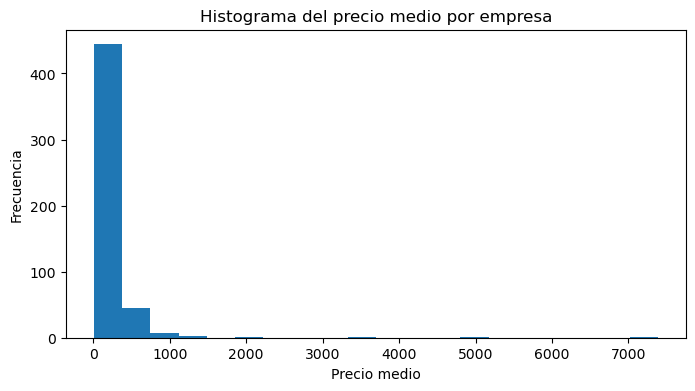

In [ ]:
# Calcular el precio medio de cierre por empresa
mean_cierre = SP500.filter(like="_closing").mean(axis=1)

plt.figure(figsize=(8,4))
plt.hist(mean_cierre, bins=20)
plt.title("Histograma del precio medio por empresa")
plt.xlabel("Precio medio")
plt.ylabel("Frecuencia")
plt.show()



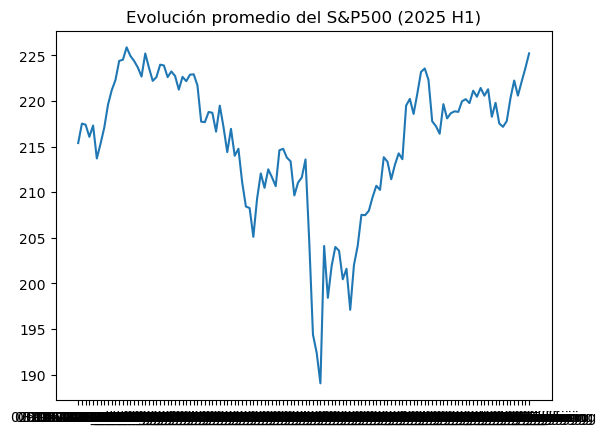

In [ ]:
plt.plot(close_cols.mean())
plt.title("Evolución promedio del S&P500 (2025 H1)")
plt.show()


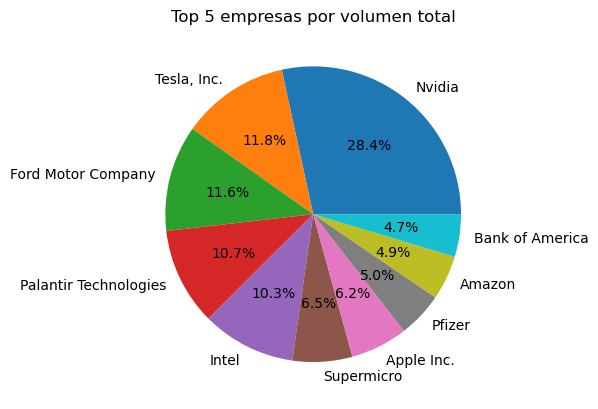

In [ ]:
top5_vol = df_volume_totals.head(10)
plt.pie(top5_vol['total_volume'], labels=top5_vol['company_name'], autopct="%1.1f%%")
plt.title("Top 5 empresas por volumen total")
plt.show()


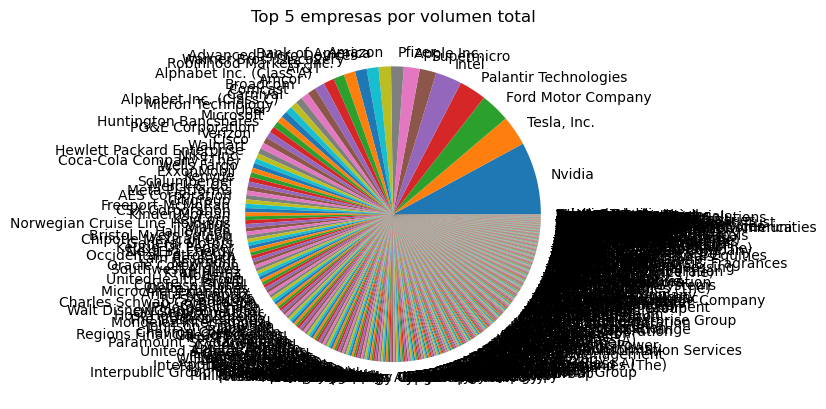

In [ ]:
top5_vol = df_volume_totals.head(500)
top10=
plt.pie(top5_vol['total_volume'], labels=top5_vol['company_name'])
plt.title("Top 5 empresas por volumen total")
plt.show()


In [ ]:
mean_cierre = SP500.filter(like="_closing").mean(axis=1)



In [ ]:
top10_idx = mean_cierre.sort_values(ascending=False).head(10).index
top10_names = SP500.loc[top10_idx, "company_name"]


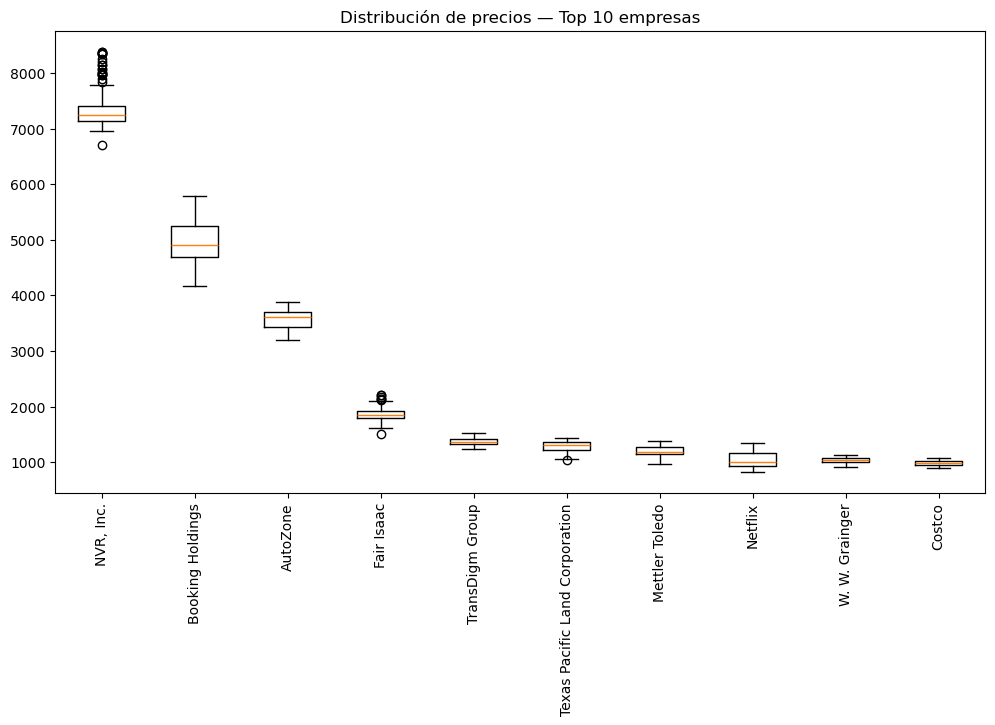

In [ ]:
plt.figure(figsize=(12,6))
plt.boxplot(close_cols.iloc[top10_idx].T)

plt.xticks(range(1, 11), top10_names, rotation=90)
plt.title("Distribución de precios — Top 10 empresas")
plt.show()


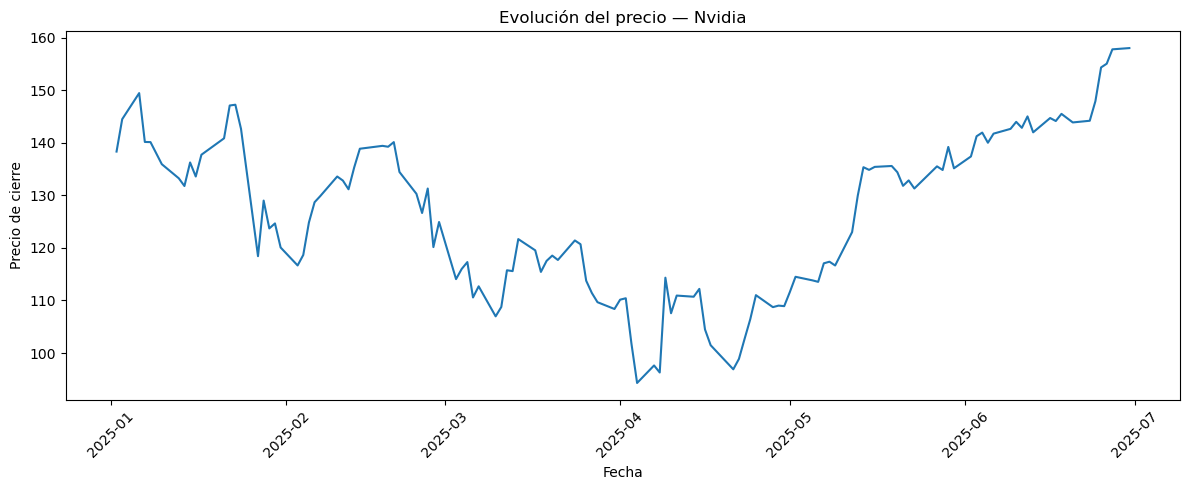

In [ ]:
company = "Nvidia"

# 1. Localizar fila
idx = SP500[SP500['company_name'] == company].index[0]

# 2. Extraer solo columnas de cierre
close_cols = SP500.filter(like="closing")

# 3. Extraer la serie de precios
series = close_cols.iloc[idx]

# 4. Extraer las fechas desde los nombres de las columnas
dates = series.index.str.replace("_closing", "")
dates = pd.to_datetime(dates, format="%d-%m-%Y")

# 5. Graficar con fechas en el eje X
plt.figure(figsize=(12,5))
plt.plot(dates, series.values)

plt.title(f"Evolución del precio — {company}")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


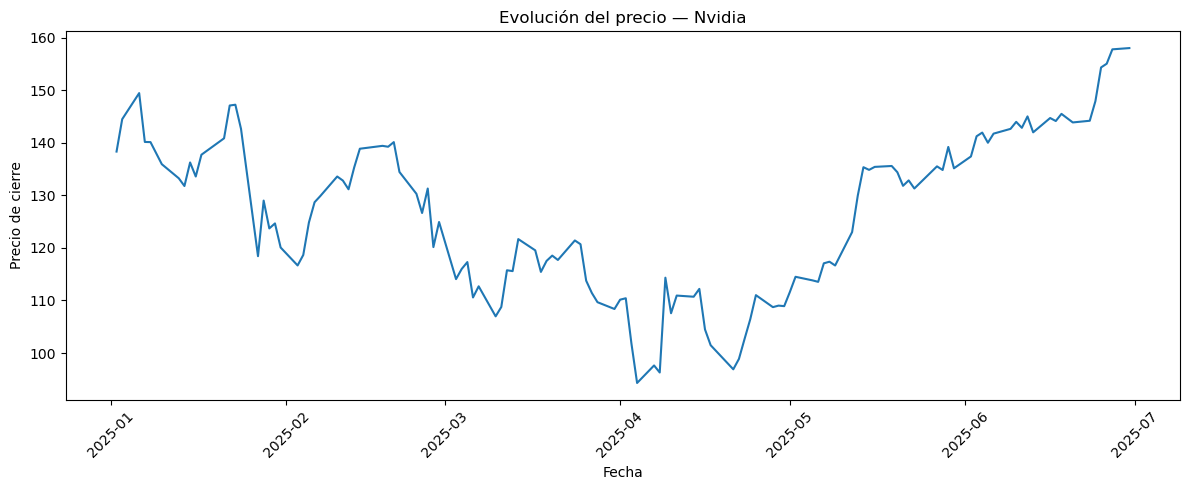

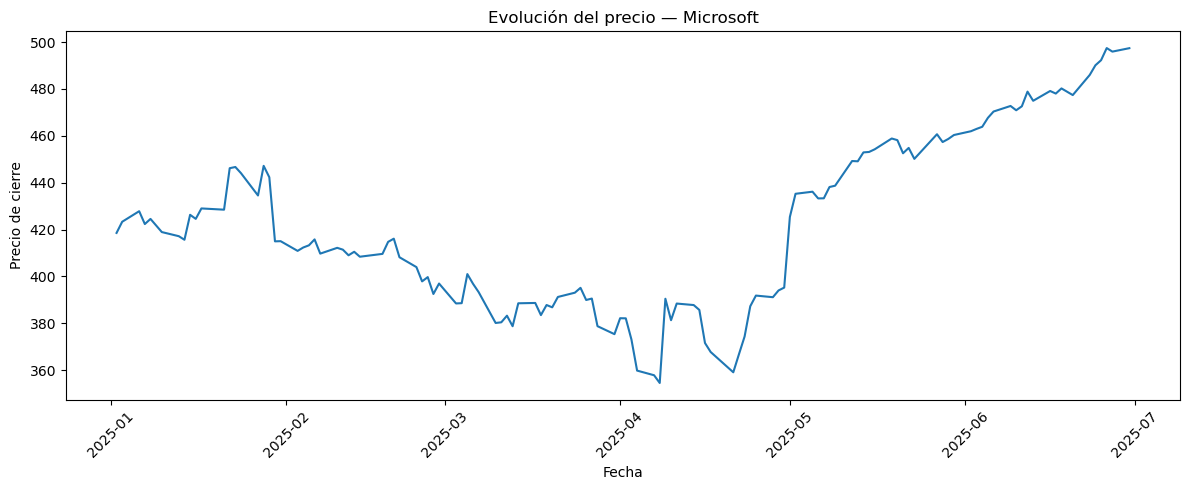

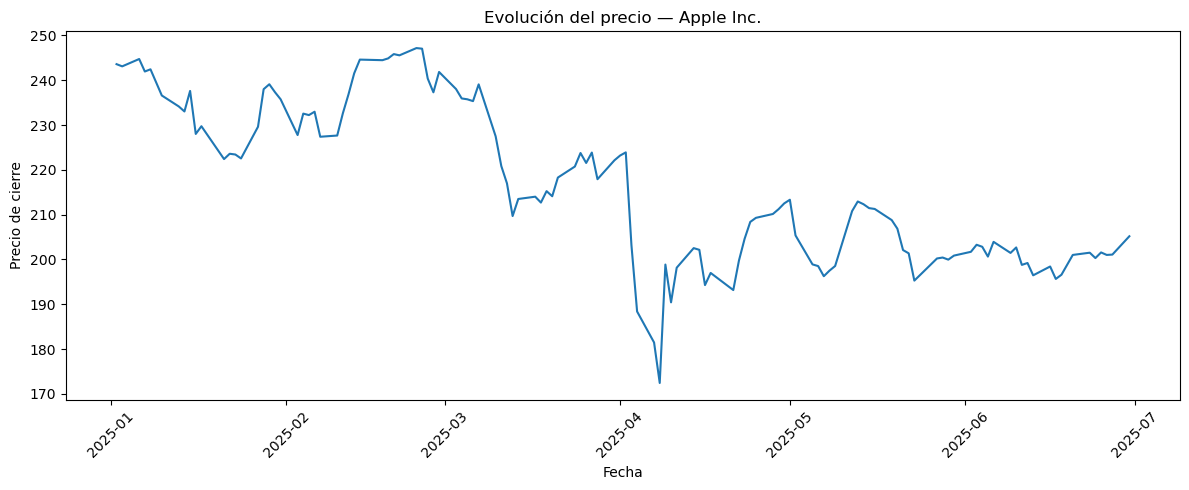

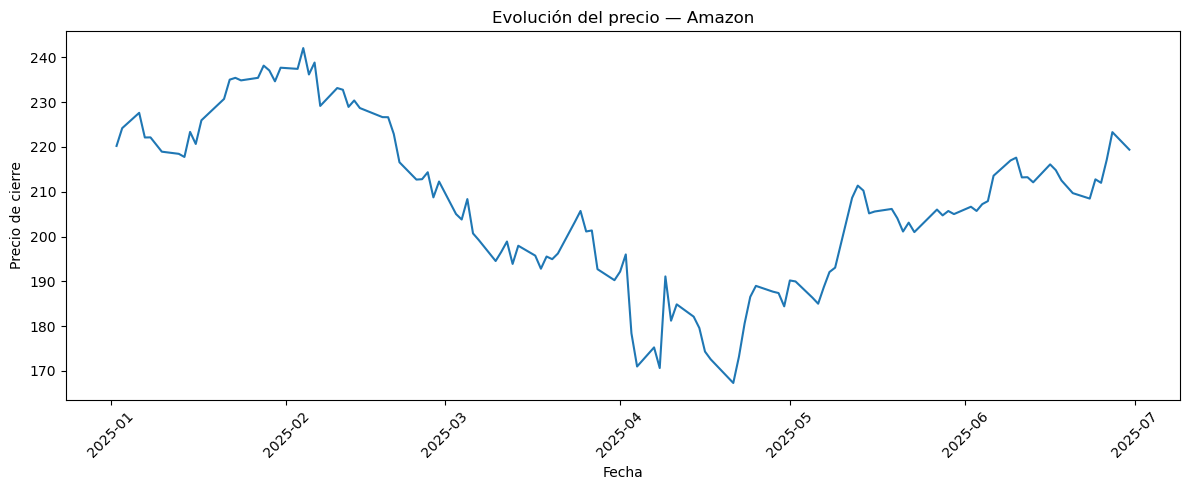

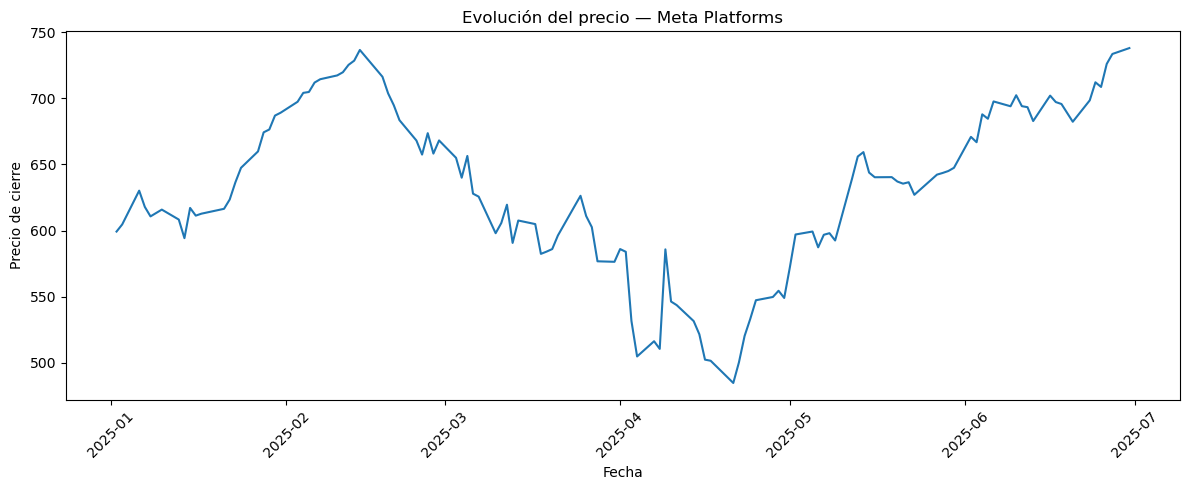

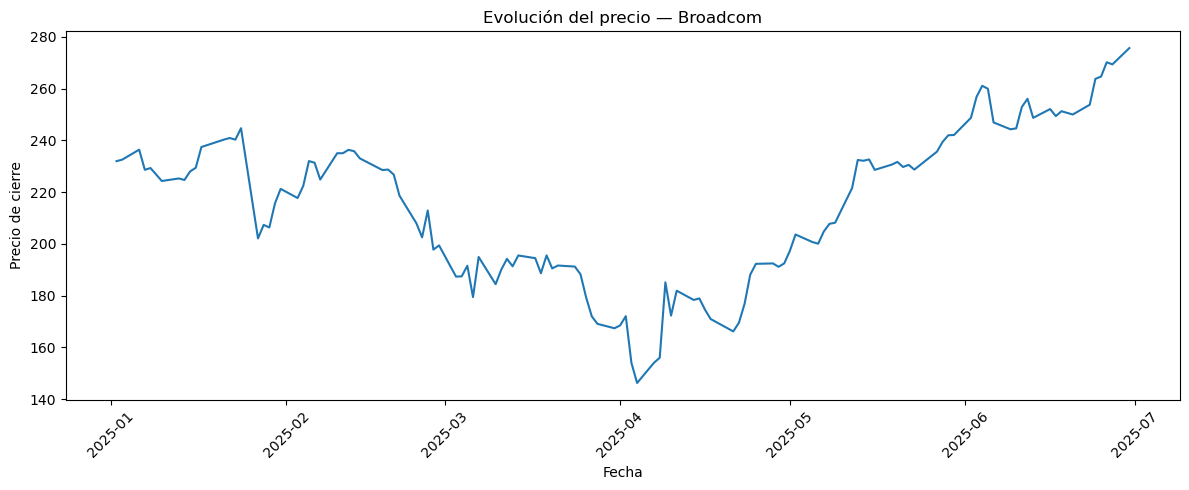

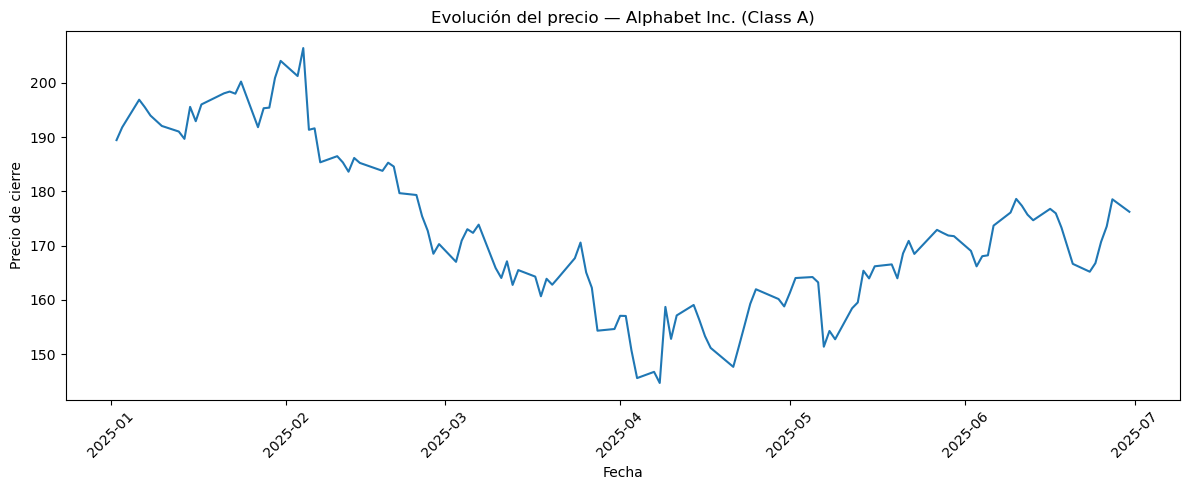

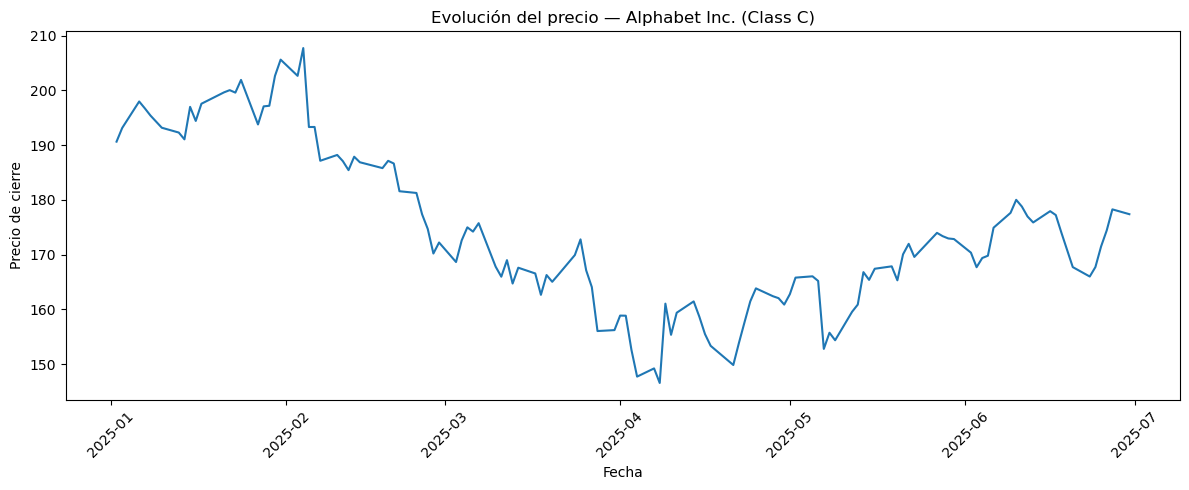

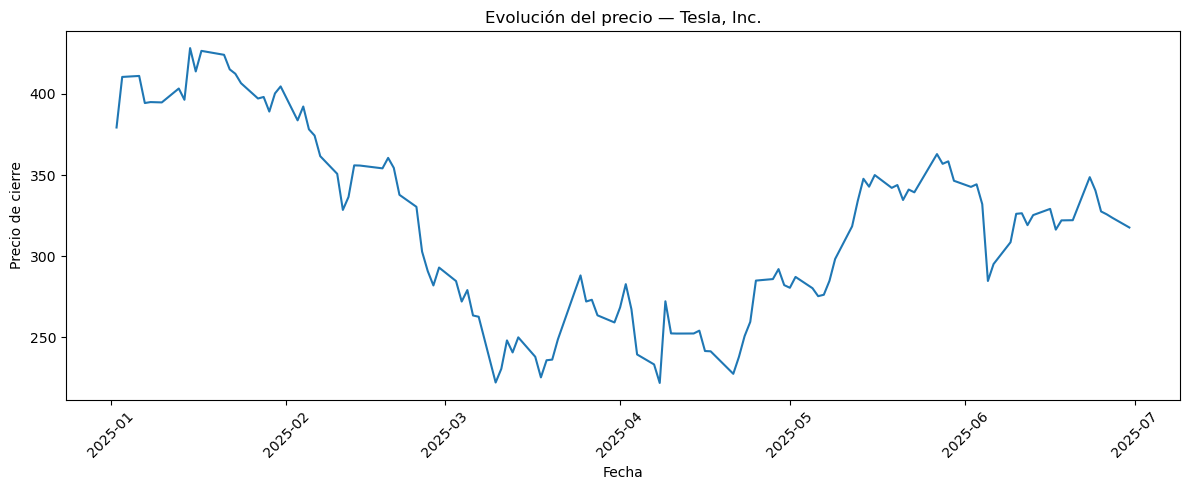

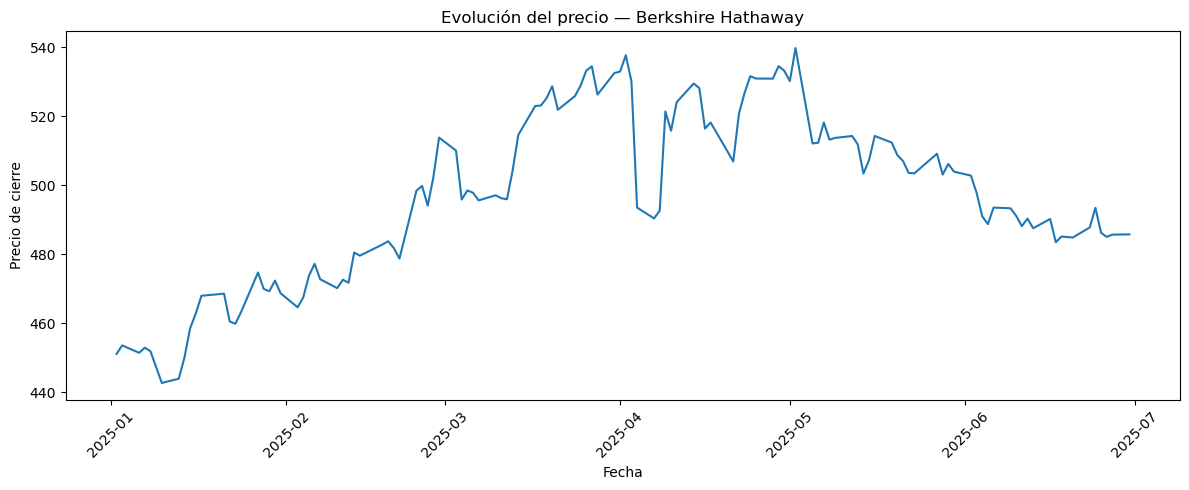

In [ ]:
# ===============================
# 0. Seleccionar las top 10 empresas
#     (por ejemplo, las 10 primeras del CSV)
# ===============================
top10 = SP500.head(10)["company_name"].tolist()

# ===============================
# 1. Extraer columnas de cierre
# ===============================
close_cols = SP500.filter(like="closing")


# ===============================
# 2. Para cada empresa, graficar su evolución
# ===============================
for company in top10:
    
    # 1. Localizar fila
    idx = SP500[SP500['company_name'] == company].index[0]
    
    # 2. Extraer la serie de precios
    series = close_cols.iloc[idx]
    
    # 3. Extraer las fechas desde los nombres de columnas
    dates = series.index.str.replace("_closing", "")
    dates = pd.to_datetime(dates, format="%d-%m-%Y")
    
    # 4. Graficar
    plt.figure(figsize=(12,5))
    plt.plot(dates, series.values)
    
    plt.title(f"Evolución del precio — {company}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


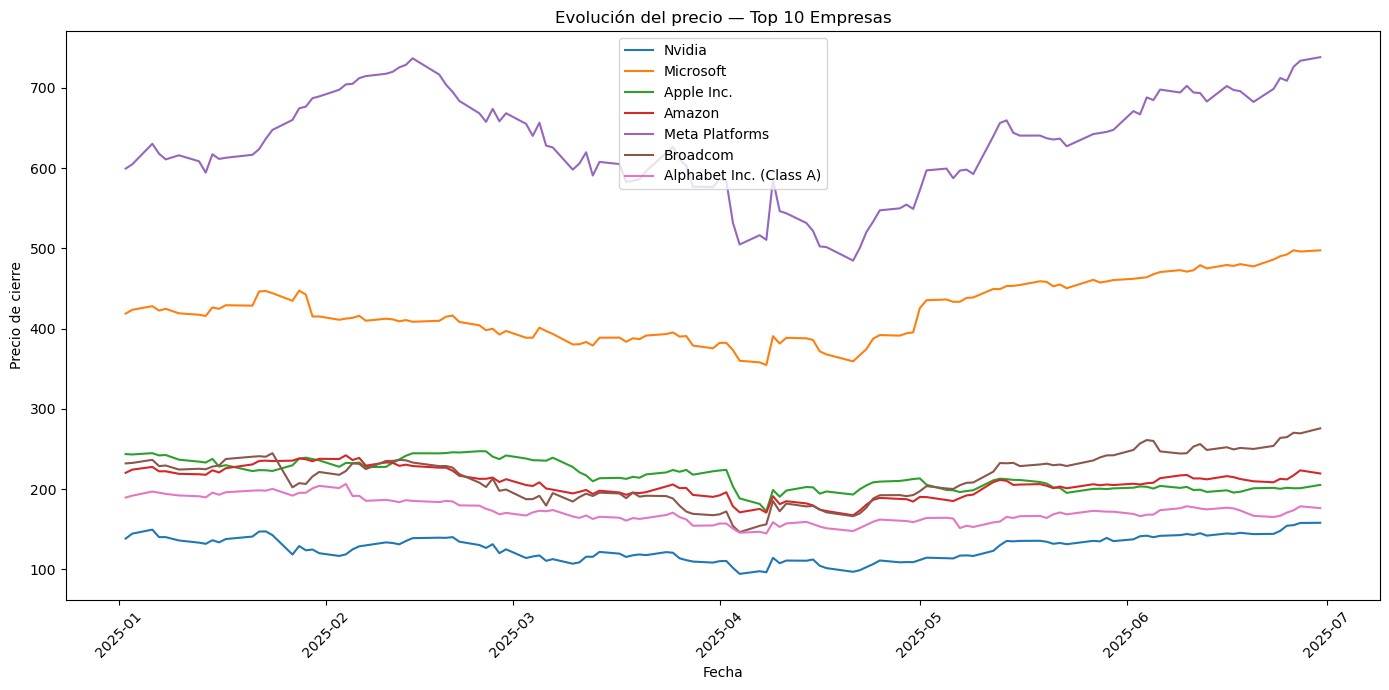

In [ ]:
# ===============================
# 0. Seleccionar las top 10 empresas
# ===============================
top10 = SP500.head(7)["company_name"].tolist()

# ===============================
# 1. Extraer columnas de cierre
# ===============================
close_cols = SP500.filter(like="closing")

# ===============================
# 2. Graficar todas en un solo gráfico
# ===============================
plt.figure(figsize=(14,7))

for company in top10:
    
    # Localizar fila
    idx = SP500[SP500['company_name'] == company].index[0]
    
    # Serie de precios
    series = close_cols.iloc[idx]
    
    # Fechas
    dates = series.index.str.replace("_closing", "")
    dates = pd.to_datetime(dates, format="%d-%m-%Y")
    
    # Añadir línea al gráfico
    plt.plot(dates, series.values, label=company)

plt.title("Evolución del precio — Top 10 Empresas")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


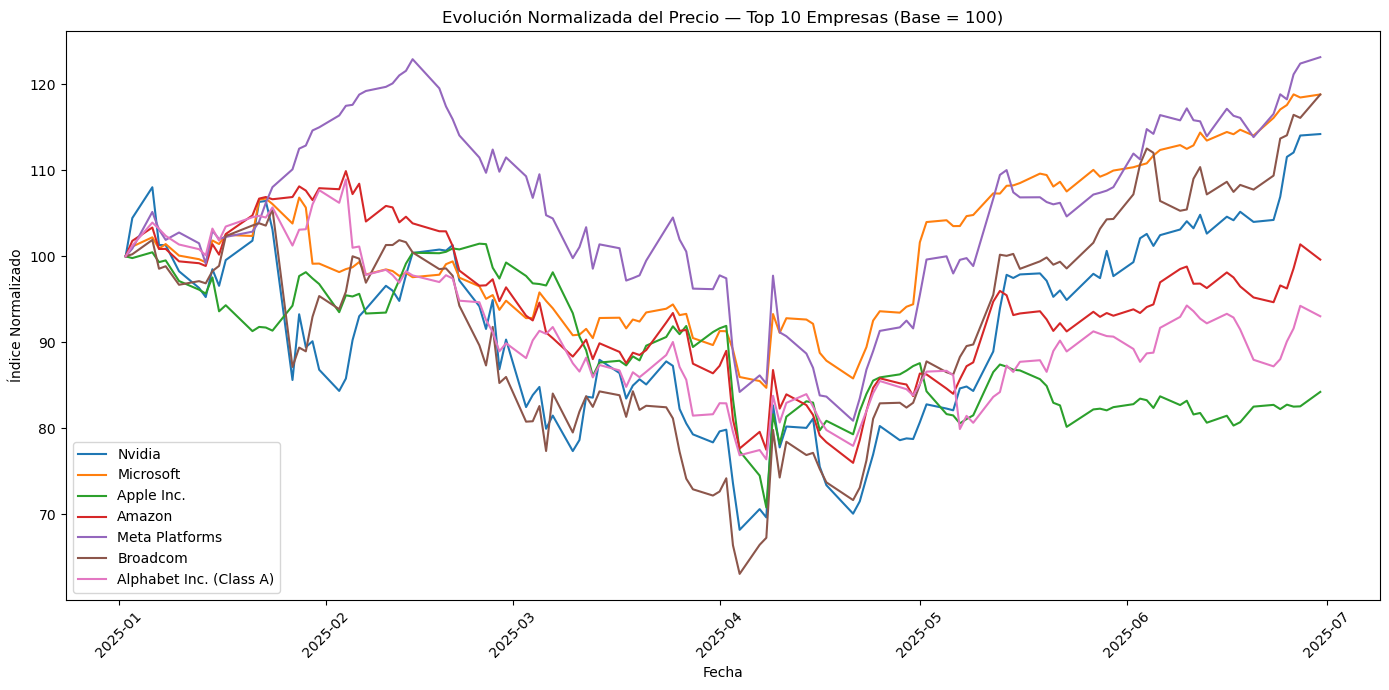

In [ ]:
# ===============================
# 0. Seleccionar las top 10 empresas
# ===============================
top10 = SP500.head(7)["company_name"].tolist()

# ===============================
# 1. Extraer columnas de cierre
# ===============================
close_cols = SP500.filter(like="closing")

# ===============================
# 2. Graficar todas normalizadas en un único gráfico
# ===============================
plt.figure(figsize=(14,7))

for company in top10:
    
    # Localizar fila
    idx = SP500[SP500['company_name'] == company].index[0]
    
    # Serie diaria de precios
    series = close_cols.iloc[idx]
    
    # Fechas
    dates = series.index.str.replace("_closing", "")
    dates = pd.to_datetime(dates, format="%d-%m-%Y")
    
    # Normalización: todas las series empiezan en 100
    normalized = (series.values / series.values[0]) * 100
    
    # Añadir línea al gráfico
    plt.plot(dates, normalized, label=company)

plt.title("Evolución Normalizada del Precio — Top 10 Empresas (Base = 100)")
plt.xlabel("Fecha")
plt.ylabel("Índice Normalizado")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


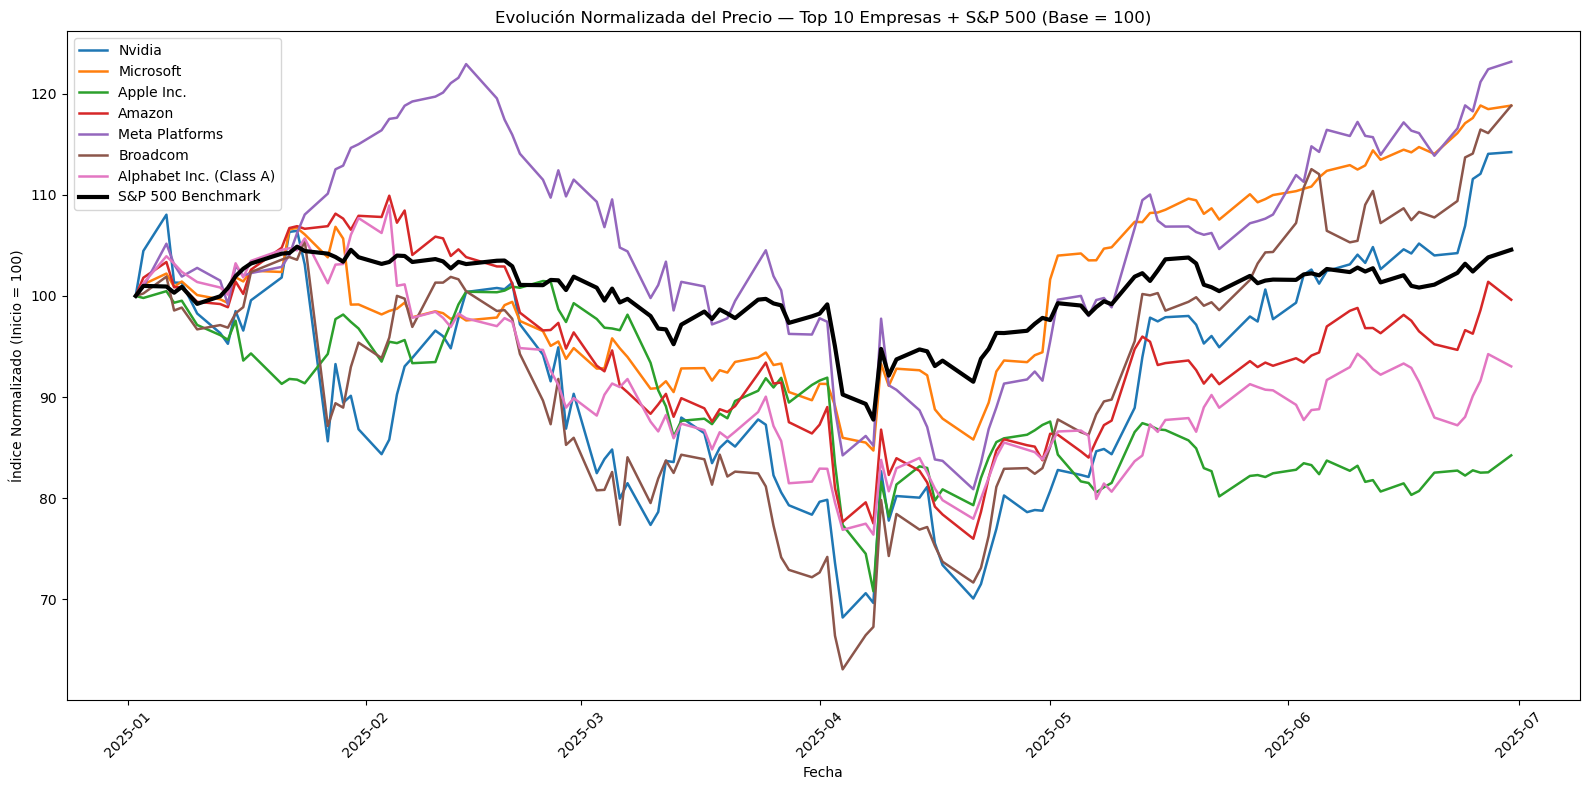


Crecimiento final desde el inicio (valor final del índice):

Nvidia                    → 114.23
Microsoft                 → 118.83
Apple Inc.                → 84.23
Amazon                    → 99.62
Meta Platforms            → 123.17
Broadcom                  → 118.82
Alphabet Inc. (Class A)   → 93.03
S&P 500 Benchmark         → 104.57


In [ ]:
# ===============================
# 0. Seleccionar las top 10 empresas
# ===============================
top10 = SP500.head(7 )["company_name"].tolist()

# ===============================
# 1. Extraer columnas de cierre
# ===============================
close_cols = SP500.filter(like="closing")

# ===============================
# 2. Crear figura
# ===============================
plt.figure(figsize=(16,8))

# ===============================
# 3. Graficar cada empresa normalizada
# ===============================
final_values = {}  # para guardar el valor final y luego imprimirlo

for company in top10:
    
    # Localizar fila de esa empresa
    idx = SP500[SP500['company_name'] == company].index[0]
    
    # Seleccionar su serie
    series = close_cols.iloc[idx]
    
    # Convertir fechas
    dates = series.index.str.replace("_closing", "")
    dates = pd.to_datetime(dates, format="%d-%m-%Y")
    
    # Normalización (arrancar en 100)
    normalized = (series.values / series.values[0]) * 100
    
    # Guardar valor final
    final_values[company] = normalized[-1]
    
    # Graficar
    plt.plot(dates, normalized, label=company, linewidth=1.8)

# ===============================
# 4. Crear benchmark del S&P 500
# ===============================
# Promedio diario de todas las empresas del dataset  
sp500_series = close_cols.mean(axis=0)

# Fechas del benchmark
sp500_dates = sp500_series.index.str.replace("_closing", "")
sp500_dates = pd.to_datetime(sp500_dates, format="%d-%m-%Y")

# Normalizar benchmark
sp500_norm = (sp500_series.values / sp500_series.values[0]) * 100

final_values["S&P 500 Benchmark"] = sp500_norm[-1]

plt.plot(sp500_dates, sp500_norm, label="S&P 500 Benchmark", 
         color="black", linewidth=3)

# ===============================
# 5. Ajustes del gráfico
# ===============================
plt.title("Evolución Normalizada del Precio — Top 10 Empresas + S&P 500 (Base = 100)")
plt.xlabel("Fecha")
plt.ylabel("Índice Normalizado (Inicio = 100)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===============================
# 6. Imprimir valores finales
# ===============================
print("\nCrecimiento final desde el inicio (valor final del índice):\n")
for k, v in final_values.items():
    print(f"{k:25s} → {v:.2f}")


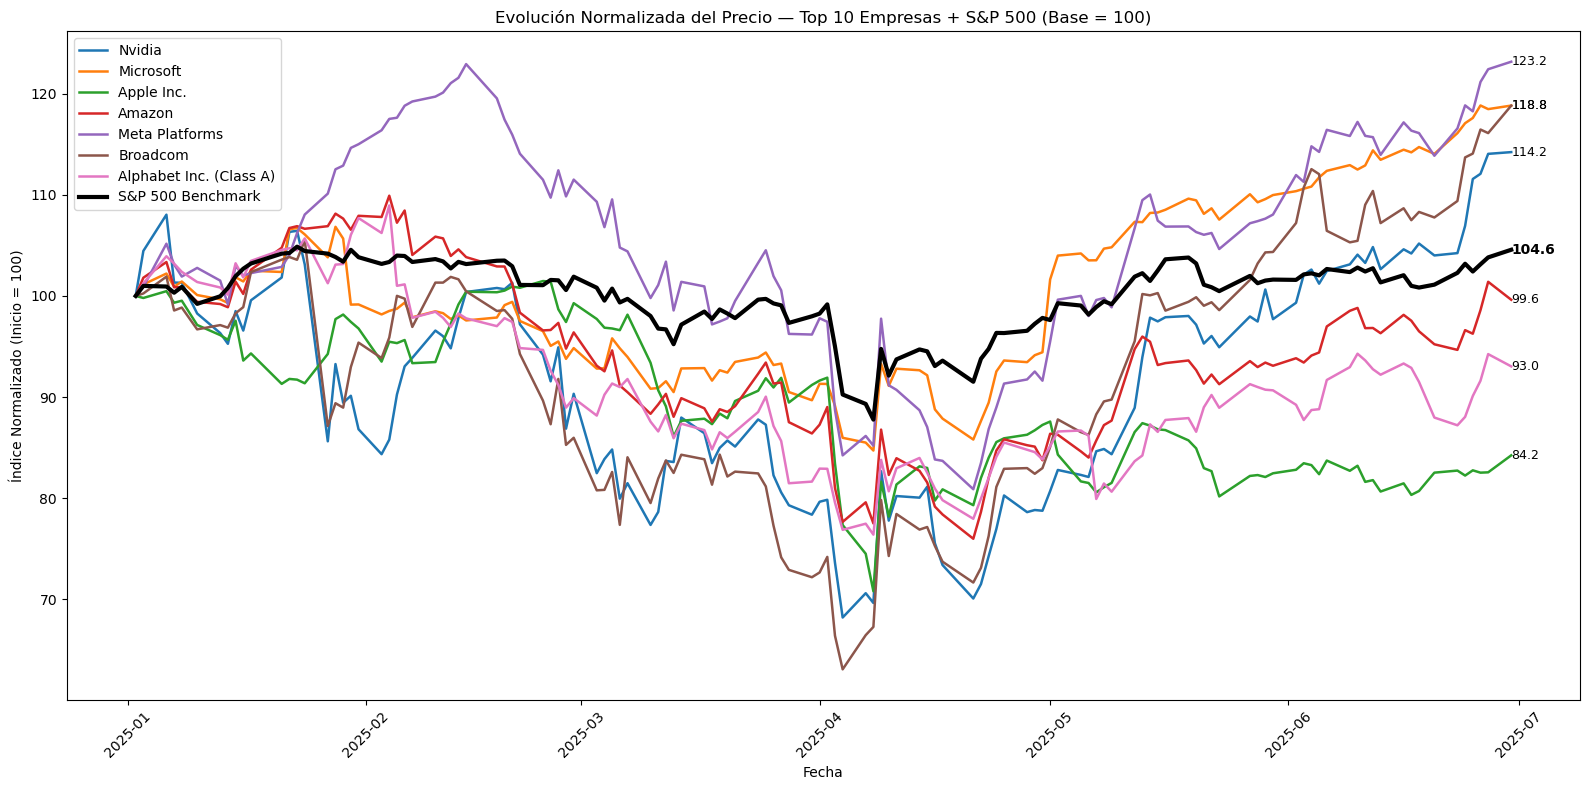


Crecimiento Final desde 100:

Nvidia                    → 114.23
Microsoft                 → 118.83
Apple Inc.                → 84.23
Amazon                    → 99.62
Meta Platforms            → 123.17
Broadcom                  → 118.82
Alphabet Inc. (Class A)   → 93.03
S&P 500 Benchmark         → 104.57


In [ ]:
# ===============================
# 0. Seleccionar las top 10 empresas
# ===============================
top10 = SP500.head(7 )["company_name"].tolist()

# ===============================
# 1. Extraer columnas de cierre
# ===============================
close_cols = SP500.filter(like="closing")

plt.figure(figsize=(16,8))

final_values = {}

# ===============================
# 2. Graficar empresas normalizadas
# ===============================
for company in top10:
    
    idx = SP500[SP500['company_name'] == company].index[0]
    series = close_cols.iloc[idx]

    # Fechas
    dates = series.index.str.replace("_closing", "")
    dates = pd.to_datetime(dates, format="%d-%m-%Y")

    # Normalización
    normalized = (series.values / series.values[0]) * 100
    final_values[company] = normalized[-1]

    # Línea
    plt.plot(dates, normalized, label=company, linewidth=1.8)

    # Etiqueta final (valor final al final de la línea)
    plt.text(
        dates[-1],
        normalized[-1],
        f"{normalized[-1]:.1f}",
        fontsize=9,
        va='center'
    )

# ===============================
# 3. Benchmark S&P 500
# ===============================
sp500_series = close_cols.mean(axis=0)
sp500_dates = sp500_series.index.str.replace("_closing", "")
sp500_dates = pd.to_datetime(sp500_dates, format="%d-%m-%Y")

sp500_norm = (sp500_series.values / sp500_series.values[0]) * 100
final_values["S&P 500 Benchmark"] = sp500_norm[-1]

plt.plot(sp500_dates, sp500_norm, color="black", linewidth=3, label="S&P 500 Benchmark")

# Etiqueta final del benchmark
plt.text(
    sp500_dates[-1],
    sp500_norm[-1],
    f"{sp500_norm[-1]:.1f}",
    fontsize=10,
    va='center',
    fontweight='bold',
    color="black"
)

# ===============================
# 4. Ajustes estéticos
# ===============================
plt.title("Evolución Normalizada del Precio — Top 10 Empresas + S&P 500 (Base = 100)")
plt.xlabel("Fecha")
plt.ylabel("Índice Normalizado (Inicio = 100)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===============================
# 5. Valores finales ordenados (para consola)
# ===============================
print("\nCrecimiento Final desde 100:\n")
for k, v in final_values.items():
    print(f"{k:25s} → {v:.2f}")


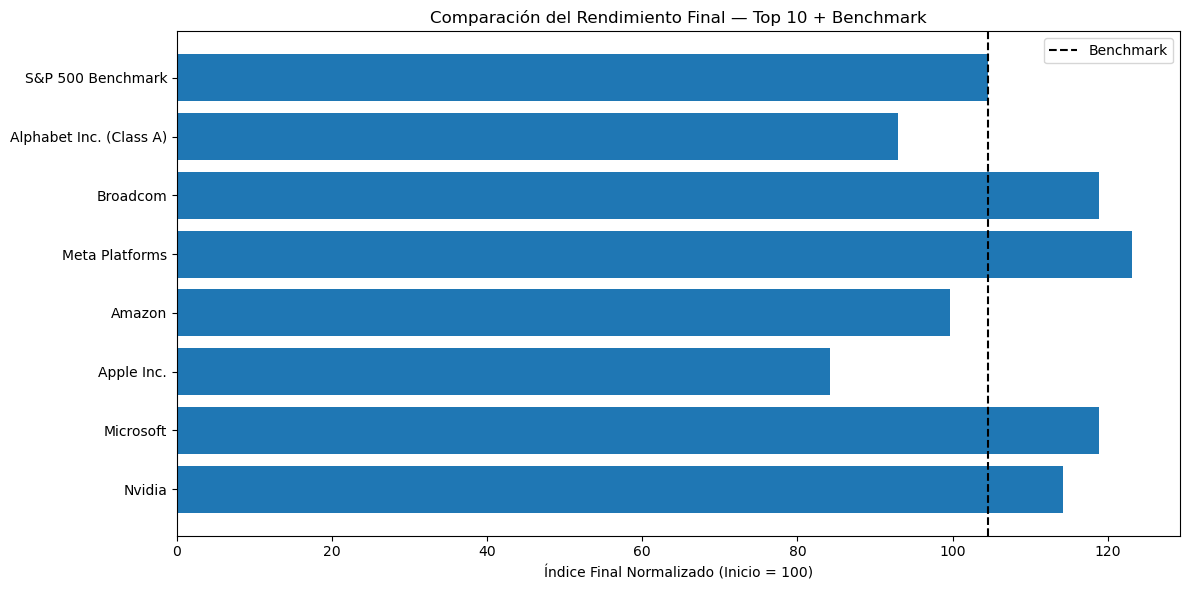

In [ ]:
import matplotlib.pyplot as plt

# Convertimos final_values en un objeto ordenable
items = list(final_values.items())
names = [x[0] for x in items]
values = [x[1] for x in items]

plt.figure(figsize=(12,6))
plt.barh(names, values)
plt.xlabel("Índice Final Normalizado (Inicio = 100)")
plt.title("Comparación del Rendimiento Final — Top 10 + Benchmark")
plt.axvline(final_values["S&P 500 Benchmark"], color="black", linestyle="--", label="Benchmark")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
ranking = sorted(final_values.items(), key=lambda x: x[1], reverse=True)

print("\n📊 Ranking de rendimiento (mayor → menor):\n")
for name, val in ranking:
    print(f"{name:25s} → {val:.2f}")



📊 Ranking de rendimiento (mayor → menor):

Meta Platforms            → 123.17
Microsoft                 → 118.83
Broadcom                  → 118.82
Nvidia                    → 114.23
S&P 500 Benchmark         → 104.57
Amazon                    → 99.62
Alphabet Inc. (Class A)   → 93.03
Apple Inc.                → 84.23


In [ ]:
benchmark = final_values["S&P 500 Benchmark"]

outperformers = [(n, v) for n, v in final_values.items() if n != "S&P 500 Benchmark" and v > benchmark]
outperformers_sorted = sorted(outperformers, key=lambda x: x[1], reverse=True)

top3 = outperformers_sorted[:3]

print("\n🏆 Top 3 que superan al S&P 500:\n")
for name, val in top3:
    print(f"{name:25s} → {val:.2f}  (vs benchmark {benchmark:.2f})")



🏆 Top 3 que superan al S&P 500:

Meta Platforms            → 123.17  (vs benchmark 104.57)
Microsoft                 → 118.83  (vs benchmark 104.57)
Broadcom                  → 118.82  (vs benchmark 104.57)
